# Configuration

In [1]:
!pip install --upgrade uv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 21.5 MB/s eta 0:00:00


In [2]:
!uv venv --python 3.11

Using CPython 3.11.11 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate


In [3]:
!wget https://bootstrap.pypa.io/get-pip.py

--2025-02-06 09:09:32--  https://bootstrap.pypa.io/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2300183 (2.2M) [text/x-python]
Saving to: ‘get-pip.py’

get-pip.py          100%[===================>]   2.19M  --.-KB/s    in 0.07s   

2025-02-06 09:09:32 (31.7 MB/s) - ‘get-pip.py’ saved [2300183/2300183]



In [4]:
!source .venv/bin/activate && python get-pip.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.7 MB/s eta 0:00:00


In [5]:
!source .venv/bin/activate && which pip

/content/.venv/bin/pip


In [6]:
!source .venv/bin/activate && pip install browser-use && pip install groq && pip install langchain-groq

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [7]:
!source .venv/bin/activate && playwright install --with-deps chromium

Installing dependencies...
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,606 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,230 kB]
Get:13 https://r2u.stat.ill

# Code

In [8]:
%%writefile agent.py
import os
from dotenv import load_dotenv
import asyncio
from langchain_groq import ChatGroq
from groq import Groq
from browser_use import Agent
from browser_use.browser.browser import Browser
from browser_use.browser.browser import BrowserConfig
from browser_use.browser.context import BrowserContextConfig, BrowserContextWindowSize

load_dotenv()

# Initialize Groq client
llm = ChatGroq(
    api_key=os.environ.get("GROQ_API_KEY"),
    model="llama-3.3-70b-versatile",
    temperature=0.0,
)

# client = Groq(
#     api_key=os.environ.get("GROQ_API_KEY"),
# )

# completion = client.chat.completions.create(
#     model="llama-3.2-11b-vision-preview",
#     messages=[{"role":"system", "content":"Hi"}],
#     temperature=0.0
# )
async def run_agent():
    config = BrowserConfig(headless=True,
                           disable_security=True)
    browser = Browser(config)

    agent = Agent(
        task="Find AI avatar-based startups, document their ideas, and include details on how much funding they have and make google sheet for that and share with aminamindhm1212@gmail.com and set this gmail as editor",
        llm=llm,
        browser=browser,
        generate_gif=False,
        use_vision=False
    )
    result = await agent.run()
    print("Agent result:", result)

# Run agent asynchronously
asyncio.run(run_agent())


Writing agent.py


INFO     [browser_use] BrowserUse logging setup complete with level info
INFO     [root] Anonymized telemetry enabled. See https://docs.browser-use.com/development/telemetry for more information.
INFO     [agent] 🚀 Starting task: Find AI avatar-based startups, document their ideas, and include details on how much funding they have and make google sheet for that and share with aminamindhm1212@gmail.com and set this gmail as editor
INFO     [agent] 📍 Step 1
INFO     [agent] 🤷 Eval: Unknown
INFO     [agent] 🧠 Memory: Current date and time: 2025-02-06 09:12. Task: Find AI avatar-based startups, document their ideas, and include details on how much funding they have and make google sheet for that and share with aminamindhm1212@gmail.com and set this gmail as editor. Started with 0/1 steps
INFO     [agent] 🎯 Next goal: Search for AI avatar-based startups in Google
INFO     [agent] 🛠️  Action 1/1: {"search_google":{"query":"AI avatar-based startups"}}
INFO     [controller] 🔍  Searched for "AI
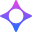
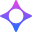
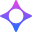
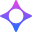

In [9]:
!source .venv/bin/activate && python agent.py